

> # 1. Introduccion

En este proyecto, se tiene como objetivo analizar el archivo "**[nacimientos2023](https://www.datos.gob.ar/dataset/salud-nacidos-vivos-registrados-por-jurisdiccion-residencia-madre---republica-argentina/archivo/salud_40e722b8-72eb-49a0-89dc-5ee174bf63b4)**", el cual contiene datos de nacidos vivos registrados en la Republica Argentina, el archivo pertenece al Ministerio de Salud. Dirección de Estadística e Información en Salud (DEIS).







## Importar librerias y cargar dataset
A continuación se importan las librerías necesarias y se carga el archivo CSV.

In [2]:
import pandas as pd
from google.colab import files

In [5]:
df = pd.read_csv("nacimientos2023.csv", sep=";")
df.head()

,anio,jurisdiccion_de_residencia_id,jurisdicion_residencia_nombre,edad_madre_grupo,instruccion_madre,tipo_de_parto_id,tipo_de_parto_nombre,semana_gestacion,intervalo_peso_al_nacer,sexo_id,Sexo,nacimientos_cantidad
0,2023,2,Ciudad Autónoma de Buenos Aires,4.25 a 29,4.Secundaria/Polimodal Incompleta,1,Simple,6.37 a 41,8.De 3500 y más,1,masculino,137
1,2023,2,Ciudad Autónoma de Buenos Aires,4.25 a 29,4.Secundaria/Polimodal Incompleta,1,Simple,6.37 a 41,5.2000 a 2499,1,masculino,3
2,2023,2,Ciudad Autónoma de Buenos Aires,4.25 a 29,4.Secundaria/Polimodal Incompleta,1,Simple,6.37 a 41,6.2500 a 2999,1,masculino,36
3,2023,2,Ciudad Autónoma de Buenos Aires,4.25 a 29,4.Secundaria/Polimodal Incompleta,1,Simple,6.37 a 41,7.3000 a 3499,1,masculino,111
4,2023,2,Ciudad Autónoma de Buenos Aires,4.25 a 29,4.Secundaria/Polimodal Incompleta,1,Simple,3.24 a 27,3.1000 a 1499,1,masculino,1


## Expansion de registros
Luego de un primer analisis del archivo se puede observar como la Serie **nacimientos_cantidad** es la responsable de enumerar cuantos registros cumplen las mismas caracteristicas, la cual, hay que expander para que cada fila sea igual a un dato

In [6]:
df = df.loc[
    df.index.repeat(df["nacimientos_cantidad"])
].reset_index(drop=True)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460902 entries, 0 to 460901
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   anio                           460902 non-null  int64 
 1   jurisdiccion_de_residencia_id  460902 non-null  int64 
 2   jurisdicion_residencia_nombre  460688 non-null  object
 3   edad_madre_grupo               460902 non-null  object
 4   instruccion_madre              460902 non-null  object
 5   tipo_de_parto_id               460902 non-null  int64 
 6   tipo_de_parto_nombre           460902 non-null  object
 7   semana_gestacion               460902 non-null  object
 8   intervalo_peso_al_nacer        460902 non-null  object
 9   sexo_id                        460902 non-null  int64 
 10  Sexo                           460902 non-null  object
 11  nacimientos_cantidad           460902 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 42.2+ M

## Exploracion inicial del dataset

Antes de realizar análisis más profundos, es importante explorar las principales variables del dataset para entender su contenido, tipo de datos y posibles inconsistencias.  
Se analizarán columnas como:
- `jurisdicion_residencia_nombre`: Ubicacion geografica
- `edad_madre_grupo`: Rango de edad de la madre al momento del nacimiento.
- `instruccion_madre`: Nivel educativo de la madre.



In [10]:
df["edad_madre_grupo"].value_counts()

,count
edad_madre_grupo,
4.25 a 29,115487
5.30 a 34,106505
3.20 a 24,102280
6.35 a 39,68671
2.15 a 19,39504
7.40 a 44,21125
9.Sin especificar,4263
8.De 45 y más,2011
1.Menor de 15,1056


In [11]:
df['jurisdicion_residencia_nombre'].value_counts()

,count
jurisdicion_residencia_nombre,
Buenos Aires,162380
Córdoba,38126
Santa Fe,37635
Ciudad Autónoma de Buenos Aires,23988
Mendoza,20036
Misiones,18932
Tucumán,18537
Salta,16974
Chaco,16769


In [12]:
df['tipo_de_parto_nombre'].value_counts()

,count
tipo_de_parto_nombre,
Simple,450531
Multiple,9000
Desconocido,1371


In [13]:
df['semana_gestacion'].value_counts()

,count
semana_gestacion,
6.37 a 41,412326
5.32 a 36,37443
4.28 a 31,3954
8.Sin especificar,3543
7.42 y más,1712
3.24 a 27,1560
2.22 a 23,313
1.Menos de 22,51


In [14]:
df["instruccion_madre"].value_counts()

,count
instruccion_madre,
5.Secundaria/Polimodal Completa,158924
4.Secundaria/Polimodal Incompleta,107822
7.Terciaria/Universitaria Completa,70604
3.Primaria/C. EGB Completa,54908
6.Terciaria/Universitaria Incompleta,31665
8.Sin especificar,26131
2.Primaria/C. EGB Incompleta,9961
1.Sin instrucción,887


## Inconsistencias en el nivel educativo de madres adolescentes

In [27]:
edad_menor_a_20 = df[(df['edad_madre_grupo'] == "2.15 a 19") | (df["edad_madre_grupo"] == "1.Menor de 15")]
edad_menor_a_20['instruccion_madre'].value_counts()

,count
instruccion_madre,
4.Secundaria/Polimodal Incompleta,21657
5.Secundaria/Polimodal Completa,8501
3.Primaria/C. EGB Completa,5938
8.Sin especificar,2413
2.Primaria/C. EGB Incompleta,1288
6.Terciaria/Universitaria Incompleta,569
1.Sin instrucción,103
7.Terciaria/Universitaria Completa,91


In [28]:
pd.crosstab(
    edad_menor_a_20["edad_madre_grupo"],
    edad_menor_a_20["instruccion_madre"]
)

instruccion_madre,1.Sin instrucción,2.Primaria/C. EGB Incompleta,3.Primaria/C. EGB Completa,4.Secundaria/Polimodal Incompleta,5.Secundaria/Polimodal Completa,6.Terciaria/Universitaria Incompleta,7.Terciaria/Universitaria Completa,8.Sin especificar
edad_madre_grupo,,,,,,,,
1.Menor de 15,8,117,237,580,37,0,0,77
2.15 a 19,95,1171,5701,21077,8464,569,91,2336


Al analizar el grupo de madres de **15 a 19 años**, se identificaron **92 casos (≈0,3 %)** que presentan **nivel universitario completo**.  

Esta clasificación no resulta compatible con las trayectorias educativas esperables para dicho rango etario, por lo que se interpreta como una posible **inconsistencia en la variable `instruccion_madre`**, atribuible a definiciones administrativas o errores de carga de datos.  

Es importante destacar que, dado que representan una **proporción muy baja** del total de registros, estas inconsistencias **no afectan los patrones generales** observados en el análisis.

In [18]:
menora20_Terciario_completo = edad_menor_a_20[edad_menor_a_20['instruccion_madre'] == '7.Terciaria/Universitaria Completa']
menora20_Terciario_completo.head()

,anio,jurisdiccion_de_residencia_id,jurisdicion_residencia_nombre,edad_madre_grupo,instruccion_madre,tipo_de_parto_id,tipo_de_parto_nombre,semana_gestacion,intervalo_peso_al_nacer,sexo_id,Sexo,nacimientos_cantidad
15531,2023,22,Chaco,2.15 a 19,7.Terciaria/Universitaria Completa,1,Simple,5.32 a 36,6.2500 a 2999,1,masculino,1
15532,2023,22,Chaco,2.15 a 19,7.Terciaria/Universitaria Completa,1,Simple,6.37 a 41,5.2000 a 2499,1,masculino,1
15533,2023,22,Chaco,2.15 a 19,7.Terciaria/Universitaria Completa,1,Simple,6.37 a 41,6.2500 a 2999,1,masculino,3
15534,2023,22,Chaco,2.15 a 19,7.Terciaria/Universitaria Completa,1,Simple,6.37 a 41,6.2500 a 2999,1,masculino,3
15535,2023,22,Chaco,2.15 a 19,7.Terciaria/Universitaria Completa,1,Simple,6.37 a 41,6.2500 a 2999,1,masculino,3


In [19]:
menora20_Terciario_completo['jurisdicion_residencia_nombre'].value_counts()

,count
jurisdicion_residencia_nombre,
Buenos Aires,25
Chaco,21
Ciudad Autónoma de Buenos Aires,6
Salta,6
Santa Fe,5
Mendoza,4
Entre Ríos,4
Santiago del Estero,3
Neuquén,3


Las inconsistencias en el nivel educativo de madres adolescentes no se distribuyen homogéneamente entre provincias. En particular, **Chaco** presenta una concentración inusualmente elevada de registros con nivel terciario/universitario completo en menores de 20 años, en relación con su volumen total de nacimientos.


##¿En que provincia se concentran los embarazos adolescentes?

In [21]:
edad_menor_a_20['jurisdicion_residencia_nombre'].value_counts()

,count
jurisdicion_residencia_nombre,
Buenos Aires,13452
Santa Fe,3593
Córdoba,3132
Misiones,2667
Chaco,2194
Salta,1922
Tucumán,1628
Corrientes,1596
Mendoza,1549


In [23]:
tasa_menor20 = (
    edad_menor_a_20.groupby('jurisdicion_residencia_nombre').size()
    /
    df.groupby('jurisdicion_residencia_nombre').size()
) * 100

tasa_menor20.sort_values(ascending=False)

,0
jurisdicion_residencia_nombre,
Formosa,14.363636
Misiones,14.087260
Chaco,13.083666
Salta,11.323200
Santiago del Estero,11.288013
Corrientes,11.197643
San Juan,10.352221
Santa Fe,9.546964
Entre Ríos,9.152277


El análisis por tasas revela que, aun cuando las provincias más pobladas concentran la mayor cantidad absoluta de nacimientos, las tasas más elevadas de maternidad adolescente se observan en provincias del NEA y NOA, particularmente `Formosa`, `Misiones` y `Chaco`, donde de cada 100 nacimientos, ≈14 pertenecen a mujeres inferior a 20 años






### Graficos:

/tmp/ipython-input-1223603494.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tasa_df, x='Tasa <20 años', y='Provincia', palette='viridis', orient='h')


Text(0, 0.5, 'Provincia')

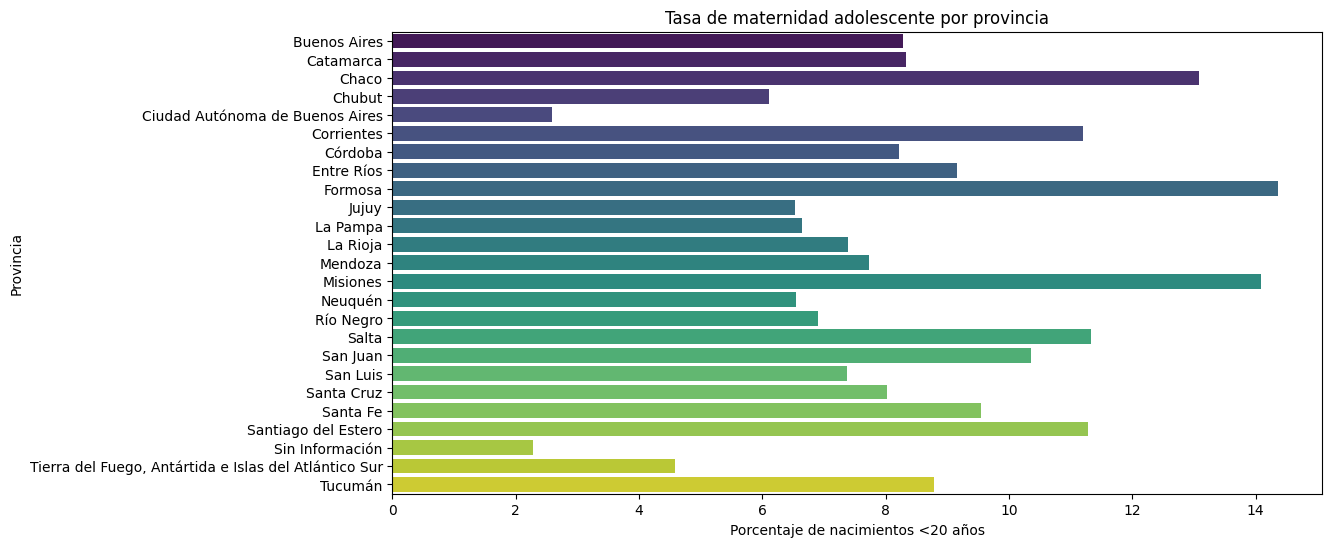

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir la serie a dataframe para facilitar el plotting
tasa_df = tasa_menor20.reset_index()
tasa_df.columns = ['Provincia', 'Tasa <20 años']

# Gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(data=tasa_df, x='Tasa <20 años', y='Provincia', palette='viridis', orient='h')
plt.title('Tasa de maternidad adolescente por provincia')
plt.xlabel('Porcentaje de nacimientos <20 años')
plt.ylabel('Provincia')

## ¿Qué tan asociado está el nivel educativo con la probabilidad de maternidad adolescente?

In [24]:
edad_menor_a_20['instruccion_madre'].value_counts(normalize=True) *100

,proportion
instruccion_madre,
4.Secundaria/Polimodal Incompleta,53.394970
5.Secundaria/Polimodal Completa,20.959073
3.Primaria/C. EGB Completa,14.640039
8.Sin especificar,5.949211
2.Primaria/C. EGB Incompleta,3.175542
6.Terciaria/Universitaria Incompleta,1.402860
1.Sin instrucción,0.253945
7.Terciaria/Universitaria Completa,0.224359


Interpretación

- Se observa una **relación inversa clara**: a menor nivel educativo, mayor es la probabilidad de maternidad adolescente.  
- Las mujeres que **no completaron la secundaria** presentan la probabilidad más alta (~20%), mientras que quienes **completaron estudios terciarios o universitarios** tienen casi nula probabilidad.  
- Algunos casos en categorías altas pueden deberse a inconsistencias en la carga de datos, por lo que la interpretación se centra en **el patrón general**.

###Grafico:

/tmp/ipython-input-3529026365.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


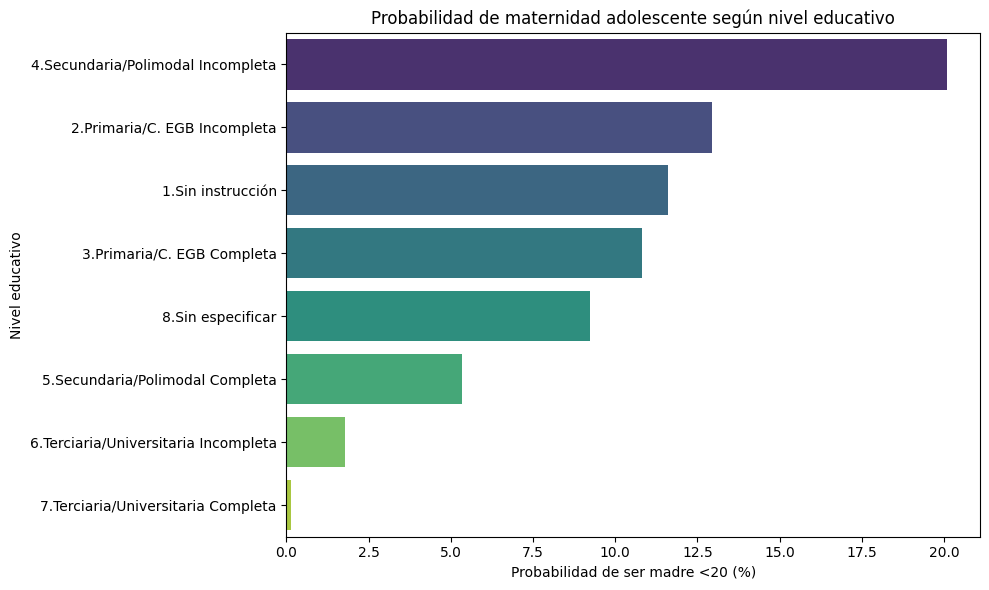

In [25]:
prob_adolescente_por_educ = (
    df[df['edad_madre_grupo'].isin(["1.Menor de 15", "2.15 a 19"])]
    .groupby('instruccion_madre')
    .size()
    /
    df.groupby('instruccion_madre').size()
) * 100

import matplotlib.pyplot as plt
import seaborn as sns

plot_data = prob_adolescente_por_educ.reset_index()
plot_data.columns = ['Nivel educativo', 'Probabilidad (%)']
plot_data = plot_data.sort_values(by='Probabilidad (%)', ascending=False)


plt.figure(figsize=(10,6))
sns.barplot(
    x='Probabilidad (%)',
    y='Nivel educativo',
    data=plot_data,
    palette='viridis'
)
plt.title('Probabilidad de maternidad adolescente según nivel educativo')
plt.xlabel('Probabilidad de ser madre <20 (%)')
plt.ylabel('Nivel educativo')
plt.tight_layout()
plt.show()
